# Pre-Processing Dataset

Here I generate the `gal_fname1` which cointains the columns needed to this study: `Mr, R, R/R200, v_los, v_circ, orbital, infall, interloper`.


In [1]:
%cd ../

/Users/jesteves/Documents/GitHub/galaxyFormation


In [2]:
import sys
sys.path.append('./scripts')
from file_loc import FileLocs

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io.fits import getdata
import astropy.table as Table
import astropy.io.ascii as at

# Reading Initial Data

In [4]:
fl = FileLocs(dataset='sdss')

cat = fl.load_catalogs('cluster/main')
gal = fl.load_catalogs('galaxy/raw')

Loading Catalog: ./data/catalogs/SDSS/groupCatalog_Yang_deCarvalho2017.csv
Loading Catalog: ./data/catalogs/SDSS/groups_deCarvalho2017_R200m_galaxies_final_flag_johnnyheq.csv


In [5]:
cat

Yang,RA,DEC,redshift,N200,logM200c,logM200m,R200c,R200m,thetaR200,thetaR200m
int64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64
2,240.5602,16.1113,0.035999998450279236,525,15.444902420043945,15.61043080796355,2.8714284896850586,3.880159897239745,0.7795811316295294,1.0534475724189225
4,247.1149,40.8317,0.029999999329447746,217,14.814902305603027,14.988838641010085,1.7714285850524902,2.4220034873237517,0.5730670271152717,0.7835316364742502
5,247.1633,39.4674,0.029999999329447746,277,14.9649019241333,15.138926939889993,2.0,2.7177167877362454,0.6470111436516279,0.8791965384498562
6,167.6936,28.5374,0.032999999821186066,167,14.754902839660645,14.927840689026137,1.6857142448425293,2.3045122256737995,0.4975147606695648,0.6801442623443363
7,351.1194,14.6251,0.041999999433755875,106,14.664902687072754,14.835094504183962,1.571428656578064,2.127630582418425,0.36826592735879554,0.4986124388818472
8,239.5372,27.3133,0.09000000357627869,183,15.254901885986328,15.411329095121902,2.442857265472412,3.1653055595608754,0.28232277514615234,0.3658166554840595
9,241.5673,18.1483,0.03799999877810478,143,14.634902000427246,14.805763776646277,1.54285728931427,2.0882845757704884,0.39776457242354135,0.5383813998714762
10,223.2712,16.724,0.04500000178813934,106,14.37490177154541,14.540970333947133,1.2714285850524902,1.6928023827999323,0.27907195269288665,0.3715613166955407
11,10.4693,-9.3997,0.0560000017285347,156,15.11490249633789,15.281540679227374,2.2142856121063232,2.957436412692569,0.3955778673545872,0.5283403209497024


In [6]:
gal

Yang,objid,specobjid,distance,ra,dec,mr_petro,mu,mg,mr,mi,mz,mu_Err,mg_err,mr_err,mi_err,mz_err,photo_z,photo_zErr,z,zErr,fracDeV_i,bpt,mass,mass_p16,mass_p84,sfr,sfr_p16,sfr_p84,ssfr,ssfr_p16,ssfr_p84,mass_fire,mass_fire_p16,mass_fire_p84,age_fire,age_fire_p16,age_fire_p84,score
int64,int64,str20,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str4,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
2,1237665371723661557,2477083489036429312,135.738834222632,241.298564879647,18.26084584558,17.48854,19.75721,18.21501,17.37634,16.95171,16.6381,0.0609615,0.008713962,0.005935783,0.006074779,0.01416315,0.117663,0.021792,0.1065375,2.452199e-05,0.4905942,2,10.58861,10.49308,10.68633,-0.07285602,-0.5421439,0.2960085,-10.72217,-11.2,-10.334,37374590000.0,24188360000.0,49324600000.0,8078016000.0,4779446000.0,10227080000.0,0.856566
2,1237665428107821415,2445511568356567040,171.508636873903,238.56412770826,18.2407672679196,16.31932,18.71298,16.98568,16.19633,15.843,15.52826,0.03205757,0.004633865,0.003692101,0.003854876,0.007470628,0.064453,0.01715,0.04995852,1.184666e-05,1.0,-1,10.32373,10.22839,10.42026,-1.198831,-2.6019,-0.5137408,-11.56485,-13.00833,-10.86466,18488130000.0,15023600000.0,22695060000.0,4579532000.0,3829858000.0,5779013000.0,0.8308808
2,1237665428644823420,null,173.498011054365,239.074646969925,18.6315851506837,17.74369,21.26342,19.24348,17.60027,17.03238,16.6224,0.2952045,0.02036217,0.008256375,0.00774688,0.01928836,0.302899,0.015353,-99.0,-99.0,1.0,null,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,0.8757436
2,1237665428644888775,2443361467412539392,163.246759660063,239.132308823493,18.4659109006879,17.66026,20.36982,18.48156,17.50261,17.07461,16.67447,0.08424775,0.0088269,0.00607071,0.006116295,0.0135279,0.116192,0.01191,0.1116601,2.594067e-05,0.9906603,-1,10.69513,10.60143,10.78922,-0.998744,-2.359543,-0.2821258,-11.75,-13.12561,-11.03058,45495570000.0,38429500000.0,61801870000.0,5679056000.0,4479576000.0,8977626000.0,0.8765266
2,1237665428645019674,2443369988627654656,154.033811068271,239.475548138904,18.460401128184,17.12686,18.3683,17.3434,17.02203,16.85099,16.73031,0.03064607,0.005939393,0.006199671,0.007703912,0.02512163,0.026301,0.006888,0.03083848,7.006724e-06,0.0,1,9.003388,8.943274,9.093821,-0.4763157,-0.7448473,-0.1514794,-9.546676,-9.815816,-9.220427,701867800.0,473997300.0,955057300.0,3380052000.0,2130594000.0,4779446000.0,0.8807181
2,1237665428645019925,2443374661552072704,148.86836495571,239.488718264673,18.3716150837489,16.93894,19.32717,17.59304,16.73839,16.34778,16.02539,0.05376307,0.006460988,0.00485328,0.005070472,0.01194319,0.087452,0.01579,0.06998631,1.652068e-05,1.0,5,10.47901,10.38828,10.56711,-1.080323,-2.450889,-0.4215836,-11.6034,-12.92778,-10.96268,33769590000.0,28210060000.0,38845690000.0,10227080000.0,8477842000.0,10776850000.0,0.8807181
2,1237665428645019992,2443374936429979648,148.369846653478,239.541013372224,18.384544561721,17.08099,18.67793,17.43205,16.95458,16.73261,16.56703,0.04618878,0.006999946,0.006659066,0.008382308,0.02802264,0.0323,0.013754,0.04581517,1.127866e-05,0.09286518,1,9.531749,9.457346,9.622227,-0.3694099,-0.6738763,-0.08837827,-9.952034,-10.29066,-9.656939,1588126000.0,593651800.0,2582601000.0,3529988000.0,531287500.0,5379186000.0,0.8807181
2,1237665428645150983,2475958683289282560,143.159722457709,239.802004213502,18.3847876820098,17.72339,19.95294,18.32212,17.49247,17.03662,16.71286,0.07685973,0.009251545,0.00685283,0.006859739,0.01706356,0.105572,0.024994,0.1412849,2.340153e-05,1.0,5,10.8653,10.75991,10.97128,0.4590226,-0.04664442,0.931246,-10.44528,-10.96968,-9.990323,33132700000.0,22517430000.0,50572080000.0,4079749000.0,2180572000.0,5978926000.0,0.9000694
2,1237665428645216628,2475963631091607552,129.870359401985,239.948953810887,18.1955300

# Task to perform

1. Create New Variables
2. Create Masks
3. Assign Dynamical Classification

## New Variables

In this section we compute the distance from the center and the phase space normalized variables (`R/R_200`, `v_los/v_circ`). Also, we assign k-correction and absolute magnitudes.


In [7]:
cid  = np.array(cat['Yang'])

ra_c = np.array(cat['RA'])
de_c = np.array(cat['DEC'])
zcls = np.array(cat['redshift'])

theta200m = np.array(cat['thetaR200m']) # degrees
theta200c = np.array(cat['thetaR200']) # degrees

r200m = np.array(cat['R200m'])
r200c = np.array(cat['R200c'])
m200c = np.array(cat['logM200c'])

ra_g = np.array(gal['ra'])
de_g = np.array(gal['dec'])
distance = np.array(gal['distance'])/60

In [8]:
import esutil
gcid = np.array(gal['Yang'])
cid  = np.array(cat['Yang'])

key = esutil.numpy_util.match(cid,gcid)

In [9]:
into_cls, into_gal = key[0], key[1]

### Angular Distance

In [10]:
import smatch

# def get_angular_distance_from_cluster_center(ra_c, de_c, radius, ra_g, de_g, nside=4096):
#     maxmatch=0 # return all matches

#     # ra,dec,radius in degrees
#     matches = smatch.match(ra_c,de_c, radius, ra_g, de_g, nside=nside, maxmatch=maxmatch)

#     into_cls = matches['i1']
#     into_gal = matches['i2']
    
#     # angular distance in degrees
#     distance = getAngDist(ra_c[into_cls], de_c[into_cls], ra_g[into_gal], de_g[into_gal])
    
#     return into_cls, into_gal, distance

def getAngDist(ra1, dec1, ra2, dec2):
    # output in arcmin
    delt_lon = (ra1 - ra2)*np.pi/180.
    delt_lat = (dec1 - dec2)*np.pi/180.
    # Haversine formula
    dist = 2.0*np.arcsin( np.sqrt( np.sin(delt_lat/2.0)**2 + \
         np.cos(dec1*np.pi/180.)*np.cos(dec2*np.pi/180.)*np.sin(delt_lon/2.0)**2 ) )  
    return (dist/np.pi*180.)

In [11]:
# into_cls, into_gal, distance = get_angular_distance_from_cluster_center(ra_c, de_c, 
#                                                                         3*theta200m, ra_g, de_g, 
#                                                                         nside=4096)

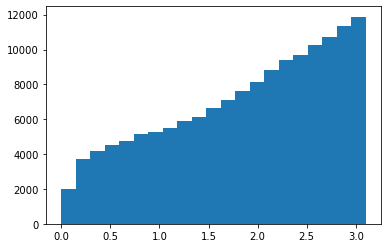

In [12]:
_ = plt.hist(distance/(theta200m[into_cls]),bins=21)

### Assigning new variables

In [13]:
data = gal[into_gal].copy()

data['Yang'] = cid[into_cls]

data['R200c'] = r200c[into_cls]
data['R200m'] = r200m[into_cls]

data['M200c'] = m200c[into_cls]
data['redshift'] = zcls[into_cls]

In [14]:
data['distance'] = distance
data['Rm'] = distance[into_gal]/theta200m[into_cls]
data['Rc'] = distance[into_gal]/theta200c[into_cls]

In [15]:
mask1 = key[0]==0
mask2 = into_cls==0

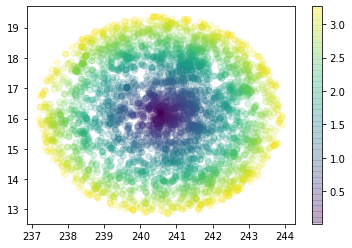

In [16]:
plt.scatter(data['ra'][mask2],data['dec'][mask2],c=data['distance'][mask2],alpha=0.2)
plt.colorbar()

## Create Masks

I use a volume limited and a magnitude threshold sample.

In [17]:
from utils import calc_kcor
from preProcessCluster import AngularDistance

Cosmology "LCDM" 
    flat = True, Om0 = 0.2700, Ode0 = 0.7299, Ob0 = 0.0457, H0 = 70.00, sigma8 = 0.8200, ns = 0.9600
    de_model = lambda, relspecies = True, Tcmb0 = 2.7255, Neff = 3.0460, powerlaw = False




In [18]:
mg = np.array(data['mg'])
mr = np.array(data['mr'])
zgal = np.array(data['z'])
smass = np.array(data['mass'])
gr = mg-mr

In [19]:
kr_gr = calc_kcor('r',zgal,'gr',gr)

In [20]:
zbins = np.arange(0.,0.3+0.01,0.01)
dmbins = AngularDistance(zbins)

In [21]:
DM = 5*np.log10(np.interp(zgal,zbins,dmbins)*1e6+1e-9)-5

In [22]:
Mr = mr-DM-kr_gr

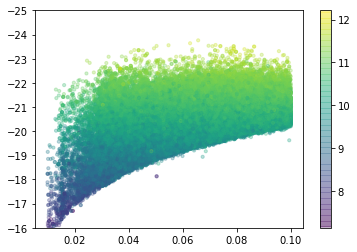

In [23]:
mask = (zgal>0.01)&(zgal<0.1)&(smass>7)
plt.scatter(zgal[mask],Mr[mask],c=smass[mask],s=10,alpha=0.3)
plt.ylim(-16,-25)
plt.colorbar()

## Assign Dynamical Classification

Assign probability for three dynamical classes: `interloper`, `orbital`, `infall`.


# Add Other Public Datasets

## Match with Morphology

We match our sample with Dominguez et al. 2018 morphology sample.

## Match with Bulge+Disk 

We match our sample with Mendel et al. 2014 sample.

# Save Output Samples

# Old Stuff

## Mask Data

In [24]:
mask = gal0['z']>0.
mask&= (gal0['mass']>0)
mask&= (gal0['sfr']>-99)

Nsize = np.count_nonzero(mask)

print('Masking Galaxies with no redshift or mass estimations')
print('New Size: %i'%(Nsize))
print('fraction: %.2f'%(1.*Nsize/len(gal0)))

NameError: name 'gal0' is not defined

In [ ]:
gal = gal0[mask].copy()

In [ ]:
def get_percentile_curve(x,y,alpha=5,Npoints=15):
    xbins  = np.percentile(x,np.linspace(0,100,Npoints))
    indices= [(x>=xl)&(x<xh) for xl, xh in zip(xbins[:-1],xbins[1:])]
    ycurve = np.array([np.percentile(y[idx],alpha) for idx in indices])
    return ycurve, 0.5*(xbins[1:]+xbins[:-1])

In [ ]:
mass        = np.array(gal['mass'])
zgal        = np.array(gal['z'])
zmask       = (zgal>=0.025)&(zgal<=0.105)
ylow, zbins = get_percentile_curve(zgal[zmask],mass[zmask],Npoints=16)

## Magnitude Limit
---------------------------------------

Definit the mass limit of the study

In [ ]:
mass = 10**np.array(gal['mass'])
z    = np.array(gal['z'])

In [ ]:
plt.scatter(z,mass,s=10,c='k')
plt.yscale('log')

In [ ]:
zlim = (z>0.09)&(z<=0.1)
mass_lim_th = np.log10(np.percentile(mass[zlim],5))
print('Log Stellar Mass Lim: %.3f'%mass_lim_th)

In [ ]:
zmask = (z>0.03)&(z<0.1)
plt.scatter(z[zmask],mass[zmask],s=50,alpha=0.1,color='k')
plt.axhline(10**mass_lim_th,ls='--',lw=3,color='r')
plt.plot(zbins,10**ylow ,ls='--',lw=3,color='lightgray')
plt.yscale('log')
plt.ylim(7e7,9e11)

In [ ]:
mass_lim = np.interp(gal0['z'],zbins,ylow)
mass_mask = gal0['mass']>=mass_lim
# mass_mask = gal0['mass']>=mass_lim_th
gal = gal0[mask&mass_mask].copy()

In [ ]:
# plt.scatter(gal0['z'],10**gal0['mass'],s=10,c='lightgray',alpha=0.3)
# plt.scatter(gal['z'],10**gal['mass'],s=10,c='k')
# plt.plot(zbins,10**ylow ,ls='--',lw=3,color='r')
# plt.xlim(0.025,0.105)
# plt.yscale('log')

# Computing new variables
---------------------------------------


In [ ]:
from astropy.cosmology import FlatLambdaCDM
from colossus.cosmology import cosmology

from astropy import units as u
from astropy.constants import G, c

params = dict(H0 = 70, Om0 = 0.27, Ob0 = 0.0457, Tcmb0 = 2.7255, Neff = 3.046)
sigma8 = 0.82
ns = 0.96

astropy_cosmo = FlatLambdaCDM(**params)
astropy_cosmo.name = 'LCDM'
colossus_cosmo = cosmology.fromAstropy(astropy_cosmo, sigma8, ns, name = 'my_cosmo')

#cosmology.setCosmology('planck15')

In [ ]:
Msol = 1.98847e33
Mpc2cm = 3.086e+24
rad2deg= 180/np.pi
h=0.7
c_kms = c.value/1000

def AngularDistance(z):
    DA = float( (cosmo.luminosity_distance(z)/(1+z)**2)/u.Mpc ) # in Mpc
    return DA
AngularDistance = np.vectorize(AngularDistance)

#--- Critical universe density
def rhoc(z):
    try:
        rho_c = float(cosmo.critical_density(z)/(u.g/u.cm**3)) # in g/cm**3
    except:
        rho_c = [float(cosmo.critical_density(zi)/(u.g/u.cm**3)) for zi in z]
        rho_c = np.array(rho_c)
    
    rho_c = rho_c*(Mpc2cm**3)/Msol # in Msol/Mpc**3
    return rho_c

def convertM200toR200(M200,z, nc=200):
    ## M200 in solar masses
    ## R200 in Mpc
    rho = nc*rhoc(z)
    r200 = (3*M200/(4*np.pi/rho))**(1/3.)
    return r200/1e9

In [ ]:
m200 = np.array(10**cat['logM200'])
r200v= np.array(cat['R200'])
zcls = np.array(cat['z'])

r200c= convertM200toR200(m200*cosmo.h,zcls)

In [ ]:
plt.plot([0.4,2.5],[0.4,2.5],'k--',lw=3)
plt.scatter(r200v,r200c)

## Defining R200m
See this pages for more info:<br>
https://bdiemer.bitbucket.io/colossus/halo_concentration.html#halo.concentration.concentration <br>
https://bdiemer.bitbucket.io/colossus/halo_mass_defs.html

```
from colossus.halo import profile_nfw
profile = profile_nfw.NFWProfile(M = 1E12, mdef = 'vir', z = 0.0, c = 10.0)
R200m = profile.RDelta(0.0, '200m')
rho = profile.density(R200m)
Sigma = profile.surfaceDensity(R200m)
M200m = profile.enclosedMass(R200m)
```

In [ ]:
i = 150
Mi = 10**cat['logM200'][i]
Ri = float(cat['R200'][i])
zi = int(cat['z'][i])

In [ ]:
from colossus.halo import concentration
from colossus.halo import mass_defs

print(cosmology.getCurrent())
print('\n')

ci = concentration.concentration(Mi, '200c', zi, model = 'diemer15')
M200m, R200m, c200m = mass_defs.changeMassDefinition(Mi, c200, zi, '200c', '200m')

print(f'Input - M200c, Rvir, c_200c: {np.log10(Mi):.2f}, {Ri:.2f}, {ci:.2f}')
print(f'Output - M200m, R200m, c_200m: {np.log10(M200m):.2f}, {R200m/1000.:.2f}, {c200m:.2f}')

In [ ]:
def convert_mass_defs(Mi,zi,mdef='200m'):
    ci = concentration.concentration(Mi, '200c', zi, model = 'diemer15')
    M200m, R200m, c200m = mass_defs.changeMassDefinition(Mi, c200, zi, '200c', mdef)
    return M200m, R200m, c200m

In [ ]:
out = [convert_mass_defs(Mi,zi,'200m') for Mi,zi in zip(m200,zcls)]
M200m = np.array([line[0] for line in out])
R200m = np.array([line[1]/1000. for line in out])
c200m = np.array([line[2] for line in out])

In [ ]:
# plt.plot([13.5,15.7],[13.5,15.7],'k--',lw=2)
# plt.scatter(cat['logM200'],np.log10(M200m), s=100,alpha=0.2)

In [ ]:
plt.scatter(r200v,R200m, s=100,alpha=0.2)
plt.ylabel('R200m', fontsize=16)
plt.xlabel('Rvir', fontsize=16)

## Distance From The Center
---------------------------------------

To have the phase space we need first to compute the distance from the center, $R/R_{200}$.

In [ ]:
#DA = AngularDistance(zcls)
def convertDegreeToMpc(theta,z):
    da     = AngularDistance(z)
    length = (theta*np.pi/180)*da
    return length

def convertR200toM200(R200,z, nc=200):
    ## M200 in solar masses
    ## R200 in Mpc
    rho = rhoc(z)
    M200 = nc*4*np.pi*rho*R200**3/3
    return M200



In [ ]:
import esutil
gcid = np.array(gal['Yang'])
cid  = np.array(cat['Yang'])

key = esutil.numpy_util.match(cid,gcid)

In [ ]:
gal['row']      = np.where(mask&mass_mask)[0]
gal['redshift'] = np.zeros(len(gal))
gal['redshift'][key[1]] = cat['z'][key[0]]

gal['M200']    = np.zeros(len(gal))
gal['M200'][key[1]] = 10**cat['logM200'][key[0]]

gal['M200m']    = np.zeros(len(gal))
gal['M200m'][key[1]] = M200m[key[0]]

gal['R200']    = 99.*np.ones(len(gal))
gal['R200'][key[1]] = r200c[key[0]]

gal['R200m']    = 99.*np.ones(len(gal))
gal['R200m'][key[1]] = R200m[key[0]]

gal['R'] = convertDegreeToMpc(gal['distance']/60.,gal['redshift'])

In [ ]:
gal['Rnm']= gal['R']/gal['R200m']
gal['Rn']= gal['R']/gal['R200']

In [ ]:
fig = plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)

a = plt.hist(gal['Rn'],bins=21)
plt.xlabel(r'$R/R_{200c}$',fontsize=16)

plt.subplot(1, 2, 2)
plt.hist(gal['Rnm'],bins=21)
plt.xlabel(r'$R/R_{200m}$',fontsize=16)

The line of sight velocity
---------------------------------------


Here we compute the line of sight velocity assuming the redshift given by the Yang catalog. For the orbital classification we also need to compute the cluster circular velocity.

In [ ]:
def get_los_velocity(z_gal,z_BCG):
    return c_kms*(z_gal - z_BCG)/(1 + z_BCG)

In [ ]:
def vcirc(mass,redshift,mdef,cosmo):
    '''Calculate circular velocity in km/s for halos of mass M (Msun/h)'''
    rho_crit = cosmo.critical_density(redshift)
    if mdef[-1] == 'c':
        delta = int(mdef[:-1])
        rho = delta*rho_crit
    elif mdef[-1] == 'm':
        delta = int(mdef[:-1])
        rho = delta*rho_crit*cosmo.Om(redshift)
    else:
        raise RuntimeError("Not correct mass definition")
    v = np.sqrt(G*(np.pi*4*rho/3)**(1./3)*(mass*u.Msun)**(2./3))
    a = v.to(u.km/u.s)
    return a.value

In [ ]:
vlos = np.array(get_los_velocity(gal['z'],gal['redshift']))
vc   = vcirc(10**gal['M200'],gal['redshift'],'200c',cosmo)

gal['vlos'] = vlos
gal['vlosn']= vlos/vc

vlosn = vlos/vc
rnorm = gal['Rn']

cut = np.abs(vlosn)<3.0

In [ ]:
vmask = np.abs(vlos)<=2500.
zm = np.median(vlos[vmask])
_ = plt.hist(vlos,bins=np.linspace(-3000.,3000.))
plt.axvline(zm,ls='--',lw=3,color='k',label='Median: %i km/s'%zm)
plt.legend()

In [ ]:
zm = np.median(vlos[vmask]/vc[vmask])

_ = plt.hist(vlos[vmask]/vc[vmask],bins=np.linspace(-5.,5.))
plt.axvline(zm,ls='--',lw=3,color='k',label='Median: %.3f '%zm)
plt.legend(fontsize=12)
plt.xlabel(r'$v_{los}/v_{circ}$',fontsize=18)

In [ ]:
## change the r200c to the r200m. 

In [ ]:
rcls = np.array(gal['R'])*u.Mpc
rcls = rcls.to(u.km).value

year   = 365*24*3600
to_gyr = year*1e9

In [ ]:
tinfall = (rcls/(np.abs(vlos)+1e-9))*u.s.to(u.yr)
gal['t_infall'] = tinfall

In [ ]:
plt.hist(np.log10(tinfall[vmask]),bins=np.linspace(7.,12.,21))

# Orbital Classification
---------------------------------------


Here we assign the classes, orbital, infall and interloper.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import joblib
loaded_rf = joblib.load("/Users/jesteves/Downloads/phase_space/classification_2d_rf.joblib")

In [ ]:
import pandas as pd
df   = pd.DataFrame ({ 'r2d':rnorm, 'vlos':vlosn})
tags = loaded_rf.predict(df) 


In [ ]:
tag_probability = loaded_rf.predict_proba(df) 

In [ ]:
tag_probability

In [ ]:
def get_random_assignment(prob):
    is_class = np.full(len(prob),0)
    for i,pi in enumerate(prob):
        is_class[i] = int(pi>np.random.random())
    return is_class

In [ ]:
porbital= tag_probability[:,0]
pinfall = tag_probability[:,1]
pinterl = tag_probability[:,2]

orbital = get_random_assignment(porbital)
infall  = get_random_assignment(pinfall)
interl  = get_random_assignment(pinterl)

In [ ]:
plt.hist(porbital[cut],histtype='step',lw=4,label='orbital')
plt.hist(pinfall[cut],histtype='step',lw=4,label='infall')
plt.hist(pinterl[cut],histtype='step',lw=4,label='interlopers')
plt.legend(fontsize=14)
plt.xlabel('Probability')

In [ ]:
# np.count_nonzero(orbital)/len(orbital)
# np.count_nonzero(infall)/len(orbital)
np.count_nonzero(interl)/len(orbital)

In [ ]:
gal['infall']     = infall 
gal['orbital']    = orbital
gal['interloper'] = interl

gal['pinfall']     = pinfall 
gal['porbital']    = porbital
gal['pinterloper'] = pinterl

In [ ]:
import seaborn as sns
sns.set_context('notebook')

In [ ]:
# ax = sns.jointplot(x=rnorm[cut], y=vlos[cut], kind="scatter", s=10, alpha=0.3, space=0)
# ax = sns.jointplot(x=rnorm[cut], y=vlos[cut], kind="resid", space=0, height=6, ratio=6, joint_kws = {'scatter_kws':dict(alpha=0.2,s=50)},ylim=(-1650,1650))
ax = sns.jointplot(x=rnorm[cut], y=vlosn[cut], kind="resid", space=0, height=6, ratio=6, joint_kws = {'scatter_kws':dict(alpha=0.2,s=50)})
ax.set_axis_labels(r'$R/R_{200}$', r'$v_{los}/v_{cir}$ ', fontsize=16)
ax.fig.set_figwidth(8)

In [ ]:
plt.figure(figsize=(8,4))
plt.scatter(rnorm[cut],vlosn[cut],c=tags[cut],alpha=0.7,s=30,cmap='coolwarm_r')
plt.xlabel(r'$R/R_{200m}$',fontsize=16)
plt.ylabel(r'$v_{los}/ v_{circ} $',fontsize=16)
plt.colorbar()

In [ ]:
vc2 = vcirc(gal['M200m'],gal['redshift'],'200m',cosmo)
vlosn2 = np.array(gal['vlos']/vc2)
rnorm2 = np.array(gal['Rnm'])
cut2 = np.abs(vlosn2)<3.

In [ ]:
df   = pd.DataFrame ({ 'r2d':rnorm2, 'vlos':vlosn2})
tags2 = loaded_rf.predict(df) 
tag_probability2 = loaded_rf.predict_proba(df) 

In [ ]:
porbital2= tag_probability2[:,0]
pinfall2 = tag_probability2[:,1]
pinterl2 = tag_probability2[:,2]

orbital2 = get_random_assignment(porbital2)
infall2  = get_random_assignment(pinfall2)
interl2  = get_random_assignment(pinterl2)

In [ ]:
fig = plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)

labels = ['orbital','infall','interlopers']
for i in range(3):
    plt.hist(vlosn[cut],bins=51,weights=tag_probability[cut,i],histtype='step', lw=3, label=labels[i],density=True)
# for i in range(3):
#     plt.hist(vlosn2[cut2],bins=51,weights=tag_probability2[cut2,i]
#              ,histtype='step', lw=3, label=labels[i],density=True,
#             color='C%i'%i,ls='--')

plt.legend(fontsize=14)
plt.xlabel(r'$v_{los}/ v_{circ} $',fontsize=16)
plt.title('Normalized by: Vcir(M200c), R200c',fontsize=16)
plt.ylim(-0.025,0.95)

plt.subplot(1, 2, 2)
labels = ['orbital','infall','interlopers']
for i in range(3):
    plt.hist(vlosn2[cut2],bins=51,weights=tag_probability2[cut2,i],histtype='step', lw=3, label=labels[i],density=True)

plt.legend(fontsize=14)
plt.xlabel(r'$v_{los}/ v_{circ} $',fontsize=16)
plt.title('Normalized by: Vcir(M200m), R200m',fontsize=16)
plt.ylim(-0.025,0.95)

In [ ]:
fig = plt.figure(figsize=(11,4))
plt.subplot(1, 2, 1)

labels = ['orbital','infall','interlopers']
for i in range(3):
    plt.hist(rnorm[cut],bins=51,weights=tag_probability[cut,i],histtype='step', lw=3, label=labels[i],density=True)

plt.legend(fontsize=14)
plt.xlabel(r'$R/R_{200c}$',fontsize=16)
plt.title('Normalized by: Vcir(M200c), R200c',fontsize=16)
plt.ylim(-0.025,1.5)

plt.subplot(1, 2, 2)
labels = ['orbital','infall','interlopers']
for i in range(3):
    plt.hist(rnorm2[cut2],bins=51,weights=tag_probability2[cut2,i],histtype='step', lw=3, label=labels[i],density=True)

plt.legend(fontsize=14)
plt.xlabel(r'$R/R_{200m}$',fontsize=16)
plt.title('Normalized by: Vcir(M200m), R200m',fontsize=16)
plt.ylim(-0.025,1.5)
plt.tight_layout()
plt.savefig('../plots/radial_distribtution_prob_weighted.png',dpi=100,facecolor='w',transparent=False)

# Star Forming Galaxies Classification
--------------

In first approach we assume a fixed threshold on ssfr. Next step would be to model with a linear fit.

In [ ]:
star_forming = (gal['ssfr']>-11.0)
quenching    = np.logical_not(star_forming)

In [ ]:
gal['SF'] = np.array(star_forming).astype(int)

# Match With Morphological Classification
--------------

Here we math the Dominguez et al. 2017 machine learning morphological classification with our sample.

In [ ]:
morp_fname = fl.morp_fname

In [ ]:
from astropy.io.fits import getdata
from astropy.table import Table

morph = Table(getdata(morp_fname,1))

In [ ]:
!cat ../data/README_Morph_catalogue_DS18.txt

In [ ]:
morph

In [ ]:
#!pip3 install git+https://github.com/esheldon/smatch/

In [ ]:
import smatch

nside=4096 # healpix nside
maxmatch=1 # return closest match

# ra,dec,radius in degrees
matches0 = smatch.match(gal['ra'], gal['dec'], 3.0/3600, morph['_RA'], morph['_DE'], nside=nside, maxmatch=maxmatch)
dist = np.sqrt((gal['ra'][matches0['i1']]-morph['_RA'][matches0['i2']])**2+(gal['dec'][matches0['i1']]-morph['_DE'][matches0['i2']])**2)*3600

In [ ]:
plt.figure(figsize=(5,4))
_ = plt.hist(dist,bins=np.linspace(0.,2.5))
plt.axvline(1.95,ls='--',color='k',label='cut = %.2f arcsec'%(1.95))
plt.yscale('log')
plt.xlabel('arcsec',fontsize=18)
plt.legend(fontsize=14)
plt.title('distance between matches',fontsize=18)
plt.tight_layout()
plt.savefig('../plots/'+'match_distance.png')

In [ ]:
matches = smatch.match(gal['ra'], gal['dec'], 2.9/3600, morph['_RA'], morph['_DE'], nside=nside, maxmatch=maxmatch)
dist = np.sqrt((gal['ra'][matches0['i1']]-morph['_RA'][matches0['i2']])**2+(gal['dec'][matches0['i1']]-morph['_DE'][matches0['i2']])**2)*3600

In [ ]:
indice1 = matches['i1']
indice2 = matches['i2']
fraction = len(gal[indice1])/len(gal)

print('Fraction matched: %.3f'%fraction)

In [ ]:
columns = morph.colnames[4:-3]

print('Selected Columns:',columns)

for col in columns:
    gal[col] = -99.
    gal[col][indice1] = morph[col][indice2]

# Saving File
---------------------------------------


In [ ]:
galaxy_file[:-4]+'_volumeLimited_v1'

In [ ]:
# fl.gal_fname1 = galaxy_file[:-4]+'_v1.csv'
fl.gal_fname1 = galaxy_file[:-4]+'_volumeLimited_v1'
gal.write(fl.gal_fname1,format='csv',overwrite=True)